In [1]:
# https://www.kaggle.com/competitions/pgsfashionmnist
import pandas as pd
from img_classificator import SimpleImgClassificatorManager
from keras.optimizers import RMSprop

class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_df = pd.read_csv('./input/fashion-mnist_train.csv', sep=',')
test_df = pd.read_csv('./input/fashion-mnist_test.csv', sep=',')
test_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Metal device set to: Apple M1


2023-03-11 14:40:41.647456: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-11 14:40:41.647683: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(Preprocessing: Done in 0.65 secs)
Epoch 1/50


2023-03-11 14:40:42.602987: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


375/375 [==============================] - 44s 112ms/step - loss: 0.6008 - accuracy: 0.7769 - val_loss: 1.3323 - val_accuracy: 0.5860 - lr: 5.0000e-04
Epoch 2/50
375/375 [==============================] - 41s 110ms/step - loss: 0.4140 - accuracy: 0.8467 - val_loss: 0.4195 - val_accuracy: 0.8225 - lr: 5.0000e-04
Epoch 3/50
375/375 [==============================] - 42s 111ms/step - loss: 0.3615 - accuracy: 0.8679 - val_loss: 0.2861 - val_accuracy: 0.8959 - lr: 5.0000e-04
Epoch 4/50
375/375 [==============================] - 41s 110ms/step - loss: 0.3314 - accuracy: 0.8765 - val_loss: 0.2752 - val_accuracy: 0.8966 - lr: 5.0000e-04
Epoch 5/50
375/375 [==============================] - 41s 110ms/step - loss: 0.3091 - accuracy: 0.8864 - val_loss: 0.2798 - val_accuracy: 0.8971 - lr: 5.0000e-04
Epoch 6/50
375/375 [==============================] - 41s 110ms/step - loss: 0.2958 - accuracy: 0.8916 - val_loss: 0.2346 - val_accuracy: 0.9137 - lr: 5.0000e-04
Epoch 7/50
375/375 [===================

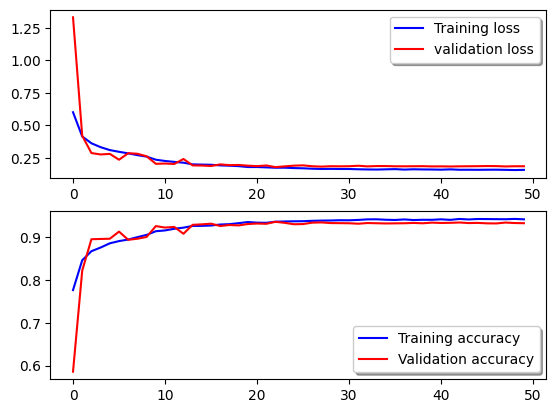

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization

filters = 64
dropout = 0.2
first_kernel=(5, 5)
second_kernel=(3, 3)
pool_size=(2, 2)

model = Sequential()
model.add(Conv2D(filters=filters, kernel_size=first_kernel, padding='Same', activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=filters, kernel_size=first_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=pool_size))
model.add(Dropout(dropout))
model.add(Conv2D(filters=filters*2, kernel_size=second_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=filters*2, kernel_size=second_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=pool_size, strides=(2, 2)))
model.add(Dropout(dropout))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(dropout))
model.add(Dense(len(class_names), activation="softmax"))

manager = SimpleImgClassificatorManager(train_df, test_df, class_names)
manager.preprocess_image_data()
manager.compile_fit_report(model, batch_size=128, epochs=50
                           , compile_optimizer=RMSprop(learning_rate=0.0005, rho=0.99, epsilon=1e-08, decay=1e-5)
                           , fit_callbacks=[manager.learning_rate_reductor()]
                           , img_data_generator=manager.image_data_generator())
manager.evaluate_report()

Epoch 1/50
375/375 [==============================] - 43s 113ms/step - loss: 0.2016 - accuracy: 0.9250 - val_loss: 0.1961 - val_accuracy: 0.9306 - lr: 1.0000e-04
Epoch 2/50
375/375 [==============================] - 41s 110ms/step - loss: 0.1773 - accuracy: 0.9333 - val_loss: 0.1858 - val_accuracy: 0.9347 - lr: 1.0000e-04
Epoch 3/50
375/375 [==============================] - 41s 109ms/step - loss: 0.1717 - accuracy: 0.9370 - val_loss: 0.1852 - val_accuracy: 0.9323 - lr: 1.0000e-04
Epoch 4/50
375/375 [==============================] - 41s 110ms/step - loss: 0.1674 - accuracy: 0.9385 - val_loss: 0.2070 - val_accuracy: 0.9256 - lr: 1.0000e-04
Epoch 5/50
375/375 [==============================] - ETA: 0s - loss: 0.1665 - accuracy: 0.9384
Epoch 5: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
375/375 [==============================] - 41s 110ms/step - loss: 0.1665 - accuracy: 0.9384 - val_loss: 0.1995 - val_accuracy: 0.9294 - lr: 1.0000e-04
Epoch 6/50
375/375 [=========

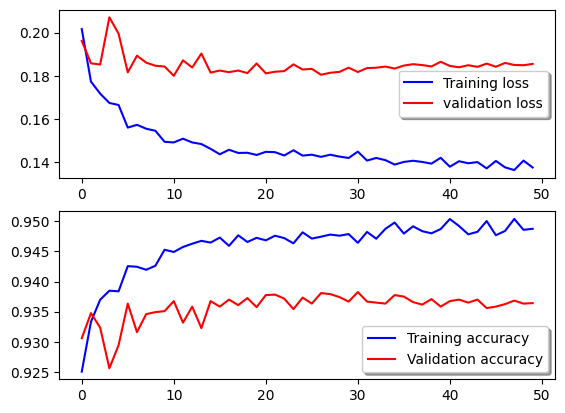

In [3]:
manager.compile_fit_report(model, batch_size=128, epochs=50
                           , compile_optimizer=RMSprop(learning_rate=0.0001, rho=0.999, epsilon=1e-08, decay=1e-5)
                           , fit_callbacks=[manager.learning_rate_reductor()]
                           , img_data_generator=manager.image_data_generator())
manager.evaluate_report()

Epoch 1/50
375/375 [==============================] - 43s 110ms/step - loss: 0.2904 - accuracy: 0.8941 - val_loss: 0.2408 - val_accuracy: 0.9108 - lr: 1.0000e-04
Epoch 2/50
375/375 [==============================] - 41s 109ms/step - loss: 0.2136 - accuracy: 0.9208 - val_loss: 0.2014 - val_accuracy: 0.9240 - lr: 1.0000e-04
Epoch 3/50
375/375 [==============================] - 41s 109ms/step - loss: 0.2020 - accuracy: 0.9245 - val_loss: 0.2002 - val_accuracy: 0.9259 - lr: 1.0000e-04
Epoch 4/50
375/375 [==============================] - 41s 109ms/step - loss: 0.1890 - accuracy: 0.9311 - val_loss: 0.1870 - val_accuracy: 0.9322 - lr: 1.0000e-04
Epoch 5/50
375/375 [==============================] - 41s 109ms/step - loss: 0.1777 - accuracy: 0.9332 - val_loss: 0.1801 - val_accuracy: 0.9350 - lr: 1.0000e-04
Epoch 6/50
375/375 [==============================] - 41s 108ms/step - loss: 0.1732 - accuracy: 0.9359 - val_loss: 0.1890 - val_accuracy: 0.9345 - lr: 1.0000e-04
Epoch 7/50
375/375 [========

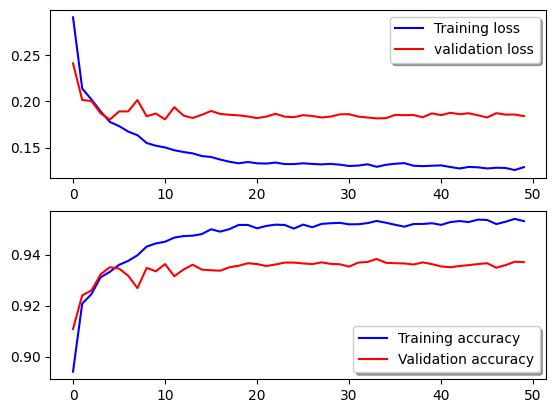

In [4]:
manager.compile_fit_report(model, batch_size=128, epochs=50
                           , compile_optimizer=RMSprop(learning_rate=0.0001, rho=0.9999, epsilon=1e-08, decay=1e-5)
                           , fit_callbacks=[manager.learning_rate_reductor()]
                           , img_data_generator=manager.image_data_generator())
manager.evaluate_report()

Epoch 1/50
375/375 [==============================] - 43s 111ms/step - loss: 0.2559 - accuracy: 0.9057 - val_loss: 0.2070 - val_accuracy: 0.9242 - lr: 1.0000e-04
Epoch 2/50
375/375 [==============================] - 41s 108ms/step - loss: 0.1868 - accuracy: 0.9296 - val_loss: 0.1854 - val_accuracy: 0.9318 - lr: 1.0000e-04
Epoch 3/50
375/375 [==============================] - 41s 109ms/step - loss: 0.1764 - accuracy: 0.9351 - val_loss: 0.1827 - val_accuracy: 0.9353 - lr: 1.0000e-04
Epoch 4/50
375/375 [==============================] - 41s 110ms/step - loss: 0.1705 - accuracy: 0.9360 - val_loss: 0.1847 - val_accuracy: 0.9337 - lr: 1.0000e-04
Epoch 5/50
375/375 [==============================] - 41s 108ms/step - loss: 0.1604 - accuracy: 0.9415 - val_loss: 0.1820 - val_accuracy: 0.9355 - lr: 1.0000e-04
Epoch 6/50
375/375 [==============================] - 41s 109ms/step - loss: 0.1568 - accuracy: 0.9422 - val_loss: 0.1853 - val_accuracy: 0.9338 - lr: 1.0000e-04
Epoch 7/50
375/375 [========

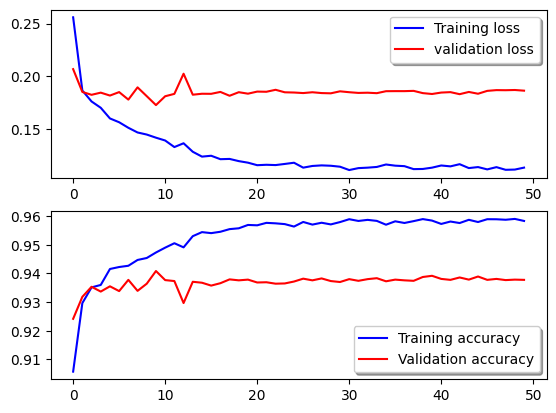

In [5]:
manager.compile_fit_report(model, batch_size=128, epochs=50
                           , compile_optimizer=RMSprop(learning_rate=0.0001, rho=0.9999, epsilon=1e-08, decay=1e-5)
                           , fit_callbacks=[manager.learning_rate_reductor()]
                           , img_data_generator=manager.image_data_generator())
manager.evaluate_report()

In [14]:
import joblib

filename = "cnn-model03-augmentation02.joblib"
joblib.dump(model, filename)

print("Model saved.")

INFO:tensorflow:Assets written to: ram://648288e4-52fe-4e04-90ba-55db9a73987b/assets


INFO:tensorflow:Assets written to: ram://648288e4-52fe-4e04-90ba-55db9a73987b/assets


Model saved.


In [20]:
import joblib
import numpy as np
from sklearn.metrics import classification_report

test_np = np.array(test_df, dtype='float32')
x_test = test_np[:, 1:] / 255
x_test = x_test.reshape(-1, 28, 28, 1)
y_test = test_df.iloc[:, 0]

model1 = joblib.load(filename)
y_pred = np.argmax(model.predict(x_test), axis=-1)

print(classification_report(y_test, y_pred, target_names=class_names))


313/313 [==============================] - 3s 11ms/step
              precision    recall  f1-score   support

 T_shirt/top       0.91      0.88      0.89      1000
     Trouser       0.99      1.00      0.99      1000
    Pullover       0.95      0.89      0.92      1000
       Dress       0.96      0.90      0.93      1000
        Coat       0.93      0.91      0.92      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.75      0.90      0.82      1000
     Sneaker       0.97      0.97      0.97      1000
         Bag       0.99      1.00      0.99      1000
  Ankle boot       0.98      0.98      0.98      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

